In [7]:
import matplotlib.pyplot as plt

from methods.unet_gan.sampler import GANSampler

In [8]:
# load the sampler
sampler = GANSampler()

### Unconditional sampling

In [9]:
# uncnoditional sampling
x_gen = sampler.unconditional_sampling(n_samples=4)  # (b h w)

In [10]:
# postprocess
x_gen = x_gen.cpu()

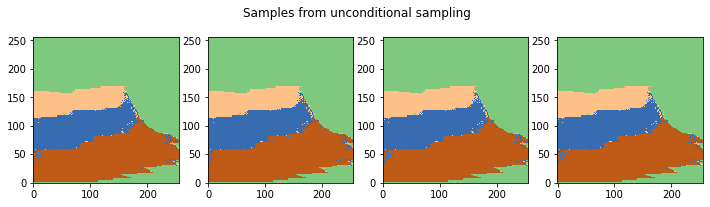

In [11]:
# plot
fig, axes = plt.subplots(1, 4, figsize=(12, 3))
n_channels = sampler.config['n_categories']
fig.suptitle('Samples from unconditional sampling')
for i in range(4):
    axes[i].imshow(x_gen[i], vmin=0, vmax=n_channels, cmap='Accent', interpolation='nearest'),
    axes[i].invert_yaxis()
plt.show()

### Conditional sampling

In [17]:
import numpy as np
from torch.utils.data import DataLoader
from methods.utils import get_root_dir, load_yaml_param_settings
from preprocessing.preprocess import DatasetImporter, GeoDataset

In [29]:
# get a pair of `x` and `x_cond`, from the test dataset

# config
config_fname = get_root_dir().joinpath('configs', 'unet_gan.yaml')
config = load_yaml_param_settings(config_fname)

# dataloader
fname = get_root_dir().joinpath('dataset', 'facies_5000.npy')
dataset_importer = DatasetImporter(fname,
                                   train_ratio=config['train_ratio'],
                                   data_scaling=True,
                                   n_categories=4)
test_dataloader = DataLoader(GeoDataset("test", dataset_importer), batch_size=config['batch_size'], num_workers=0, shuffle=True)

# get the pair
i = np.random.choice(len(test_dataloader.dataset))
x, x_cond = test_dataloader.dataset[i]  # (c h w), (c+1 h w)

x, x_cond = x.unsqueeze(0), x_cond.unsqueeze(0)  # (1 c h w), (1 c+1 h w)
x, x_cond = x.to(sampler.device), x_cond.to(sampler.device)


self.X_train.shape: (4000, 4, 128, 128)
self.X_test.shape: (1000, 4, 128, 128)


In [30]:
# conditinoal sampling
x_gen = sampler.conditional_sampling(x_cond)  # (1 h w)

In [31]:
# postprocess
x, x_cond = x.argmax(dim=1), x_cond.argmax(dim=1)
x, x_cond, x_gen = x.cpu(), x_cond.cpu(), x_gen.cpu()

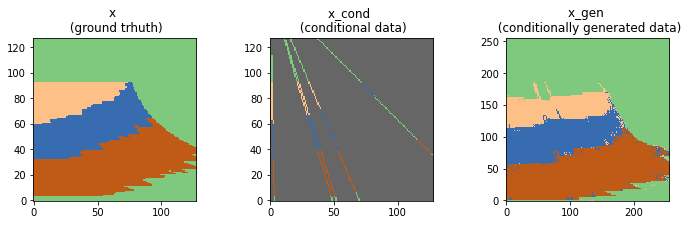

In [33]:
# plot x, x_cond ,x_gen
fig, axes = plt.subplots(1, 3, figsize=(4*3, 3))

axes[0].set_title('x \n (ground trhuth)')
axes[0].imshow(x[0], vmin=0, vmax=n_channels, cmap='Accent', interpolation='nearest')

axes[1].set_title('x_cond \n (conditional data)')
axes[1].imshow(x_cond[0], vmin=0, vmax=n_channels, cmap='Accent', interpolation='nearest')

axes[2].set_title('x_gen \n (conditionally generated data)')
axes[2].imshow(x_gen[0], vmin=0, vmax=n_channels, cmap='Accent', interpolation='nearest')

for ax in axes.flatten():
    ax.invert_yaxis()
# plt.tight_layout()
plt.show()